# Waterfall Classification.
The Waterfall Classification dataset details cybersecurity incidents affecting a variety of industries, including information about the publication date, region, type of threat actor, physical or other consequences, and a summary of the incident. It also includes references for further digging into each case.

## Library Imports.

In [66]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

## Data Import and DataFrame Information.

In [67]:
df = pd.read_csv('./data/WATERFALL.csv', index_col=0) #tomamos la primera columna como índice
df.head()

,victim,published_date,region,industry,threat_actor,sites,cost,ot_or_physical_consecuences,incident_summary,references,published_year,waterfall_report_year,waterfall_report_name
id,,,,,,,,,,,,,
0,Stuxnet,2010-07-15,Iran,Process Mfg.,Nation State,1,NaN,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,"[""en.wikipedia.org/wiki/Stuxnet""]",2010,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
3,Iran's main oil export terminals,2012-04-22,Iran,Oil & Gas,Nation State,6,NaN,Shutdown 6 terminals,6 terminals ops. affected by Flame malware. Ne...,"[""bbc.com/news/world-middle-east-59062907"",""ir...",2012,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
7,Unknown Power Plant,2012-10-?,USA,Power,Unknown,1,NaN,Delayed turbine restart (thus power generation...,10 plant PCs were infected by Mariposa malware...,"[""us-cert.gov/sites/default/files/Monitors/ICS...",2012,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
12,German steel mill,2014-12-22,Germany,Metals & Mining,Unknown,1,NaN,"Caused ""massive damage"" to plant equipment",Sophisticated attack using spear phishing and ...,"[""bbc.com/news/technology-30575104""]",2014,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
15,"Prykarpattyaoblenergo, Chernivtsioblenergo, Ky...",2015-12-13,Ukraine,Power,Nation State,32,NaN,Power outage lasts up to 6 hours affecting 230...,First publicly known attack on a power grid oc...,"[""en.wikipedia.org/wiki/2015_Ukraine_power_gri...",2015,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...


In [68]:
df.describe(include='all')

,victim,published_date,region,industry,threat_actor,sites,cost,ot_or_physical_consecuences,incident_summary,references,published_year,waterfall_report_year,waterfall_report_name
count,116,116,116,116,116,116.000000,14,116,116,116,116.000000,116.0,116
unique,116,106,51,10,4,NaN,13,116,116,116,NaN,NaN,1
top,Stuxnet,2022-02-28,USA,Discrete Mfg.,Ransomware,NaN,$60M,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,"[""en.wikipedia.org/wiki/Stuxnet""]",NaN,NaN,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
freq,1,3,21,43,89,NaN,2,1,1,1,NaN,NaN,116
mean,NaN,NaN,NaN,NaN,NaN,5.379310,NaN,NaN,NaN,NaN,2020.637931,2023.0,NaN
std,NaN,NaN,NaN,NaN,NaN,17.177668,NaN,NaN,NaN,NaN,2.212205,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2010.000000,2023.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2020.000000,2023.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2021.000000,2023.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2022.000000,2023.0,NaN


In [69]:
df.shape

(116, 13)

In [70]:
df.dtypes

victim                         object
published_date                 object
region                         object
industry                       object
threat_actor                   object
sites                           int64
cost                           object
ot_or_physical_consecuences    object
incident_summary               object
references                     object
published_year                  int64
waterfall_report_year           int64
waterfall_report_name          object
dtype: object

In [71]:
df.columns

Index(['victim', 'published_date', 'region', 'industry', 'threat_actor',
       'sites', 'cost', 'ot_or_physical_consecuences', 'incident_summary',
       'references', 'published_year', 'waterfall_report_year',
       'waterfall_report_name'],
      dtype='object')

Next, we give a brief description of what each column is about.
1. **ID**: Incident identifier.
2. **Victim**: Name of the victim.
3. **Published date**: Publication date of the incident.
4. **Region**: Affected region.
5. **Industry**: Industry of the victim.
6. **Threat actor**: Threat actor.
7. **Sites**: Number of affected sites.
8. **Cost**: Cost of the incident.
9. **Physical consequences**: Consequences of the incident.
10. **Incident summary**: Summary of the incident.
11. **References**: Related references.
12. **Waterfall report year**: Year of the Waterfall report.
13. **Waterfall_report name**: Name of the report.

In [72]:
df.head(4)

,victim,published_date,region,industry,threat_actor,sites,cost,ot_or_physical_consecuences,incident_summary,references,published_year,waterfall_report_year,waterfall_report_name
id,,,,,,,,,,,,,
0,Stuxnet,2010-07-15,Iran,Process Mfg.,Nation State,1,NaN,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,"[""en.wikipedia.org/wiki/Stuxnet""]",2010,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
3,Iran's main oil export terminals,2012-04-22,Iran,Oil & Gas,Nation State,6,NaN,Shutdown 6 terminals,6 terminals ops. affected by Flame malware. Ne...,"[""bbc.com/news/world-middle-east-59062907"",""ir...",2012,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
7,Unknown Power Plant,2012-10-?,USA,Power,Unknown,1,NaN,Delayed turbine restart (thus power generation...,10 plant PCs were infected by Mariposa malware...,"[""us-cert.gov/sites/default/files/Monitors/ICS...",2012,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
12,German steel mill,2014-12-22,Germany,Metals & Mining,Unknown,1,NaN,"Caused ""massive damage"" to plant equipment",Sophisticated attack using spear phishing and ...,"[""bbc.com/news/technology-30575104""]",2014,2023,2023 Threat Report. ICSSTRIVE & Waterfall Secu...


## Data Cleaning.
The column **Waterfall Report Year** will be removed for simplicity from the Dataframe, as it refers to the year in which a specific report related to the incidents or events recorded in the DataFrame was published. This does not provide information for the subsequent classification model or finding relationships between CSVs.

In [73]:
df.drop(columns=['waterfall_report_year'], inplace=True)

We will separate the **Published Date** column into day, month and year components, each of these as a different column, converting it into a date format.

In [74]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['day'] = df['published_date'].dt.day
df['month'] = df['published_date'].dt.month
df['year'] = df['published_date'].dt.year

We notice that there are two columns indicating the year: **Published Year** and **Year**. We will compare these to identify possible discrepancies.

In [75]:
differences = df[df['year'] != df['published_year']]

print(f"There are {differences.shape[0]} rows where 'year' and 'year_1' are different.")
differences[['year', 'published_year']].head()

There are 4 rows where 'year' and 'year_1' are different.


,year,published_year
id,,
7,NaN,2012
43,NaN,2017
58,NaN,2019
252,NaN,2021


In this case, differences have been found due to empty fields in the values ​​extracted from the **Published Date** column. However, this is not a problem, as later when we handle null values ​​we will remove these rows.

In [76]:
df.drop(columns=['published_year', 'published_date'], inplace=True)

### Handling duplicate rows.

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.drop_duplicates(inplace=True)

### Handling of null rows.

In [79]:
df.isnull().sum()

victim                           0
region                           0
industry                         0
threat_actor                     0
sites                            0
cost                           102
ot_or_physical_consecuences      0
incident_summary                 0
references                       0
waterfall_report_name            0
day                              4
month                            4
year                             4
dtype: int64

In [80]:
df.shape[0]

116

We will remove the **cost** column as it contains mostly null values.

In [81]:
df.drop(columns=['cost'], inplace=True)

In [82]:
df.dropna(inplace=True)

In [83]:
df.shape

(112, 12)

### Selection of categorical and continuous variables.
To properly perform a data analysis we must distinguish between categorical variables, variables that represent different categories or groups, and continuous variables, variables that can take any value within a given range.

In [84]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 25 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuous: {}'.format(', '.join(v_continuas)))
print('Variables categorical: {}'.format(', '.join(v_categoricas)))

Variables continuous: victim, region, sites, ot_or_physical_consecuences, incident_summary, references, day, month, year
Variables categorical: industry, threat_actor, waterfall_report_name


#### Categorical Variables Handling.
For the subsequent classification model, we need to code our variables. To do this, we will perform an ordinal coding that consists of assigning integer values ​​to the categories based on their position or hierarchy in the data.

In [85]:
df[v_categoricas].head(3)

,industry,threat_actor,waterfall_report_name
id,,,
0,Process Mfg.,Nation State,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
3,Oil & Gas,Nation State,2023 Threat Report. ICSSTRIVE & Waterfall Secu...
12,Metals & Mining,Unknown,2023 Threat Report. ICSSTRIVE & Waterfall Secu...


In [86]:
df[v_categoricas].nunique()

industry                 10
threat_actor              4
waterfall_report_name     1
dtype: int64

We decided to remove the **Waterfall Report Name** column because it contains a single value in all rows. This repeated value does not add any useful information or variability to the dataset, making its inclusion unnecessary for further analysis.

In [87]:
df.drop(columns=['waterfall_report_name'], inplace=True)

##### **Industry**.

In [88]:
df['industry'].unique()

array(['Process Mfg.', 'Oil & Gas', 'Metals & Mining', 'Power',
       'Discrete Mfg.', 'Transportation', 'All', 'Food & Beverage',
       'Agriculture', 'Water'], dtype=object)

We are going to group the different sectors into broader categories to facilitate data analysis using the **One Hot Encoding** technique. This will allow us to convert the categories into binary columns that indicate the presence or absence of each sector.

In the specific case of the **"All"** category, we will mark all the columns corresponding to the sectors with a 1, since this category represents the inclusion of all sectors in the same record. This strategy is carried out to ensure that during data analysis, the sectors are correctly represented and the impact of each of them can be effectively evaluated.

In [89]:
industry_groups = {
    'Manufacturing': ['Process Mfg.', 'Discrete Mfg.'],
    'Energy': ['Oil & Gas', 'Power'],
    'Mining': ['Metals & Mining'],
    'Agriculture': ['Food & Beverage', 'Agriculture']
}

In [90]:
def replace_with_groups(sector):
    for group, sectors in industry_groups.items():
        if sector in sectors:
            return group
    return sector

In [91]:
df['industry'] = df['industry'].apply(replace_with_groups)

In [92]:
df['industry'].unique()

array(['Manufacturing', 'Energy', 'Mining', 'Transportation', 'All',
       'Agriculture', 'Water'], dtype=object)

In [93]:
dummies = pd.get_dummies(df['industry'], prefix='industry')
dummies['industry_All'] = (df['industry'] == 'All').astype(int)
for col in dummies.columns:
    if col != 'industry_All':
        dummies[col] = dummies[col] | dummies['industry_All']

dummies.drop(['industry_All'], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [94]:
df.drop(columns=['industry'], inplace=True)

##### **Threat Actor**.

In [95]:
df['threat_actor'].unique()

array(['Nation State', 'Unknown', 'Ransomware', 'Hacktivist'],
      dtype=object)

In [96]:
encoder = OrdinalEncoder()
df['threat_actor'] = encoder.fit_transform(df[['threat_actor']])
df.head(2)

,victim,region,threat_actor,sites,ot_or_physical_consecuences,incident_summary,references,day,month,year,industry_Agriculture,industry_Energy,industry_Manufacturing,industry_Mining,industry_Transportation,industry_Water
id,,,,,,,,,,,,,,,,
0,Stuxnet,Iran,1.0,1,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,"[""en.wikipedia.org/wiki/Stuxnet""]",15.0,7.0,2010.0,False,False,True,False,False,False
3,Iran's main oil export terminals,Iran,1.0,6,Shutdown 6 terminals,6 terminals ops. affected by Flame malware. Ne...,"[""bbc.com/news/world-middle-east-59062907"",""ir...",22.0,4.0,2012.0,False,True,False,False,False,False


#### Continuous Variables Handling.
For the classification model we must convert all columns to int type. Therefore, we must see if we should perform an ordinal encoding as in the previous case or group them.

Continuous variables are divided into numeric variables and object variables, which are text strings that require coding for analysis. Although these variables are continuous in the sense that they can take many different values, they are stored as text strings.

In [97]:
df[v_continuas].head(3)

,victim,region,sites,ot_or_physical_consecuences,incident_summary,references,day,month,year
id,,,,,,,,,
0,Stuxnet,Iran,1,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,"[""en.wikipedia.org/wiki/Stuxnet""]",15.0,7.0,2010.0
3,Iran's main oil export terminals,Iran,6,Shutdown 6 terminals,6 terminals ops. affected by Flame malware. Ne...,"[""bbc.com/news/world-middle-east-59062907"",""ir...",22.0,4.0,2012.0
12,German steel mill,Germany,1,"Caused ""massive damage"" to plant equipment",Sophisticated attack using spear phishing and ...,"[""bbc.com/news/technology-30575104""]",22.0,12.0,2014.0


In [98]:
df[v_continuas].dtypes

victim                          object
region                          object
sites                            int64
ot_or_physical_consecuences     object
incident_summary                object
references                      object
day                            float64
month                          float64
year                           float64
dtype: object

In [99]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

##### **Region**.
In order to perform a more effective assessment of the countries in our data, it is convenient to group them by continent. This is especially relevant because in other CSV files there are records of attacks coming from different countries, distributed across different continents.

To facilitate this analysis, we will proceed to create six new columns in our dataset, each representing a specific continent. These columns will indicate with a value of 1 if the country belongs to the corresponding continent and 0 if not, that is, by assigning binary values.

In [100]:
df['region'].unique()

array(['Iran', 'Germany', 'Ukraine', 'France, Slovenia, Romania, India',
       'India', 'Global', 'USA', 'Taiwan', 'Norway', 'South Africa',
       'Belgium, Romania, China', 'Australia', 'USA & Canada',
       'New Zealand', 'Japan, Turkey, UK, USA',
       'Germany, France, Malaysia, USA', 'Israel', 'Canada',
       'India, UK, Brazil, Russia, USA', 'Europe, N. & S. America, Asia',
       'USA, Canada, UK', 'France', 'Netherlands', 'UK',
       'Australia, Canada, USA', 'USA, Europe, S. America', 'Spain',
       'Switzerland, Germany', 'Belgium, Africa',
       'Malta, Belgium, Netherlands', 'Switzerland', 'N. & S. America',
       'Belarus', 'Japan', 'Russia', 'Greece', 'Bulgaria', 'Costa Rica',
       'USA & Europe', 'Mexico', 'UK, USA', 'Austria',
       'Austria, Canada, Finland, USA', 'Ghana', 'Germany, USA',
       'Denmark', 'Finland', 'Italy', 'Luxembourg', 'Colombia'],
      dtype=object)

In [101]:
continents_mapping = {
    'Africa': ['Ghana', 'South Africa', 'Nigeria', 'Kenya', 'Egypt', 'Morocco', 'Zimbabwe', 'Algeria'],
    'Asia': ['Asia', 'Iran', 'India', 'Japan', 'Taiwan', 'Malaysia', 'China', 'Turkey', 'Israel', 'Saudi Arabia', 'Russia'],
    'Europe': ['Germany', 'France', 'UK', 'Italy', 'Belgium', 'Austria', 'Sweden', 'Spain', 'Norway', 'Finland', 
               'Switzerland', 'Ukraine', 'Romania', 'Denmark', 'Bulgaria', 'Greece', 'Malta', 'Portugal', 
               'Netherlands', 'Czech Republic', 'Luxembourg', 'Belarus', 'Europe'],
    'North America': ['USA', 'Canada', 'Mexico', 'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 
                     'Honduras', 'Nicaragua', 'Panama', 'N.'],
    'South America': ['Brazil', 'Colombia', 'Argentina', 'Chile', 'Peru', 'Venezuela',
                      'S. America'],
    'Australia': ['Australia', 'New Zealand'],
    'Africa, Asia, North America, Europe, South America, Australia': ['Global']
}

In [102]:
def assign_continent(region):
    region = region.replace('&', ',')
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

# Crear una nueva columna en el DataFrame con los continentes
df['continent'] = df['region'].apply(assign_continent)

In [103]:
countries_with_no_continent = df[df['continent'].isnull()]['region'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
[]


In [104]:
continent_dummies = df['continent'].str.get_dummies(sep=', ')
df = pd.concat([df, continent_dummies], axis=1)

In [105]:
df.drop(columns=['region', 'continent'], inplace=True)

##### **References**.
This column will be used later to define the relationships between CSVs. We will need to extract the domain name from the URL.

In [106]:
def clean_references(references):
    references = references.strip("[]")
    references = references.replace('"', '').replace("'", '')
    references = references.replace(',', ', ')

    references = re.sub(r'(\.com|\.org|\.es|\.net|\.co|\.gov|\.edu|\.int|\.mil)[^\s,]*', r'\1', references)
    
    return references

# Aplicar la función a la columna 'references'
df['references'] = df['references'].apply(clean_references)

In [107]:
df.head(3)

,victim,threat_actor,sites,ot_or_physical_consecuences,incident_summary,references,day,month,year,industry_Agriculture,...,industry_Manufacturing,industry_Mining,industry_Transportation,industry_Water,Africa,Asia,Australia,Europe,North America,South America
id,,,,,,,,,,,,,,,,,,,,,
0,Stuxnet,1.0,1,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,en.wikipedia.org,15.0,7.0,2010.0,False,...,True,False,False,False,0,1,0,0,0,0
3,Iran's main oil export terminals,1.0,6,Shutdown 6 terminals,6 terminals ops. affected by Flame malware. Ne...,"bbc.com, iranprimer.usip.org",22.0,4.0,2012.0,False,...,False,False,False,False,0,1,0,0,0,0
12,German steel mill,3.0,1,"Caused ""massive damage"" to plant equipment",Sophisticated attack using spear phishing and ...,bbc.com,22.0,12.0,2014.0,False,...,False,True,False,False,0,0,0,1,0,0


In [108]:
df

,victim,threat_actor,sites,ot_or_physical_consecuences,incident_summary,references,day,month,year,industry_Agriculture,...,industry_Manufacturing,industry_Mining,industry_Transportation,industry_Water,Africa,Asia,Australia,Europe,North America,South America
id,,,,,,,,,,,,,,,,,,,,,
0,Stuxnet,1.0,1,Destroyed 1000 centrifuges at Natanz,Plant was infected by the Stuxnet worm in a ta...,en.wikipedia.org,15.0,7.0,2010.0,False,...,True,False,False,False,0,1,0,0,0,0
3,Iran's main oil export terminals,1.0,6,Shutdown 6 terminals,6 terminals ops. affected by Flame malware. Ne...,"bbc.com, iranprimer.usip.org",22.0,4.0,2012.0,False,...,False,False,False,False,0,1,0,0,0,0
12,German steel mill,3.0,1,"Caused ""massive damage"" to plant equipment",Sophisticated attack using spear phishing and ...,bbc.com,22.0,12.0,2014.0,False,...,False,True,False,False,0,0,0,1,0,0
15,"Prykarpattyaoblenergo, Chernivtsioblenergo, Ky...",1.0,32,Power outage lasts up to 6 hours affecting 230...,First publicly known attack on a power grid oc...,"en.wikipedia.org, arstechnica.com",13.0,12.0,2015.0,False,...,False,False,False,False,0,0,0,1,0,0
21,"Pivnichna substation, Kyiv",1.0,1,Power outage for 20% of Kyiv for over 1 hour,Sandworm suspected in deploying Industroyer (a...,"en.wikipedia.org, arstechnica.com",17.0,12.0,2016.0,False,...,False,False,False,False,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Fruttagel,2.0,1,Shutdown production for 4+ days,A BlackCat (ALPHV) ransomware attack on Frutta...,icsstrive.com,11.0,12.0,2022.0,True,...,False,False,False,False,0,0,0,1,0,0
527,Empresas Públicas de Medellín (EPM),2.0,1,Trucked in water for 28k customers on pre-paid...,A BlackCat (ALPHV) ransomware attack shut off ...,isssource.com,13.0,12.0,2022.0,False,...,False,False,False,True,0,0,0,0,0,1
531,"Technolit GmbH, in Grossenlüder",3.0,1,Shutdown operations and sent employees home,A German manufacturer and distributor of weldi...,icsstrive.com,22.0,12.0,2022.0,False,...,True,False,False,False,0,0,0,1,0,0


## Classification models.

In [109]:
df_1 = df.drop(list(df.select_dtypes(include=['object']).columns), axis = 1)

In [110]:
df_1.nunique()

threat_actor                4
sites                      19
day                        31
month                      12
year                       11
industry_Agriculture        2
industry_Energy             2
industry_Manufacturing      2
industry_Mining             2
industry_Transportation     2
industry_Water              2
Africa                      2
Asia                        2
Australia                   2
Europe                      2
North America               2
South America               2
dtype: int64

In [111]:
X = df_1.drop('threat_actor', axis=1)
y = df_1['threat_actor']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
print(X_train.shape)
print(X_test.shape)

(89, 16)
(23, 16)


In [113]:
def mejor_modelo(X, y, modelos):
    resultados = {}
    for nombre, modelo in modelos.items():
      if nombre == 'Regresión Logística':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
      scores = cross_val_score(modelo, X, y, cv=2, scoring='accuracy')
      resultados[nombre] = scores.mean()

    mejor = max(resultados, key=resultados.get)
    return mejor, resultados

modelos = {
    'Random Forest': RandomForestClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier()
}

mejor, resultados = mejor_modelo(X_train, y_train, modelos)

print("Resultados de los modelos:")
for modelo, score in resultados.items():
    print(f"{modelo}: {score}")

print(f"\nEl mejor modelo es: {mejor}")

Resultados de los modelos:
Random Forest: 0.797979797979798
Regresión Logística: 0.8088383838383838
Árbol de Decisión: 0.7196969696969697

El mejor modelo es: Regresión Logística


#### Confusion Matrix.
The correlation matrix is ​​a statistical tool that illustrates the relationship between several variables in a dataset. Each cell in the matrix reflects the correlation coefficient between two variables, which can range from -1 to 1. The closer the absolute value is to 1, the stronger the relationship between the variables.

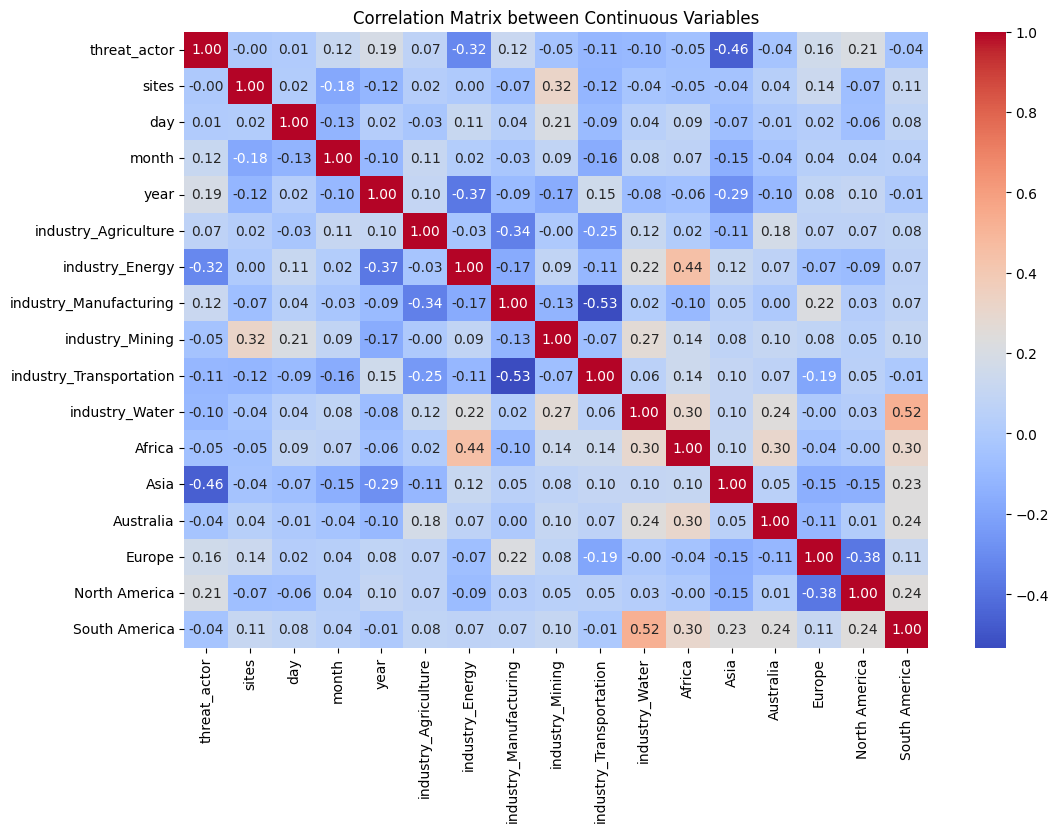

In [114]:
correlation_matrix = df_1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation Matrix between Continuous Variables')
plt.show()

## Overview graphs.

### Number of Incidents by Industry.

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_23264\3158395194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index.str.replace('industry_', ''), y=industry_counts.values, palette='viridis')


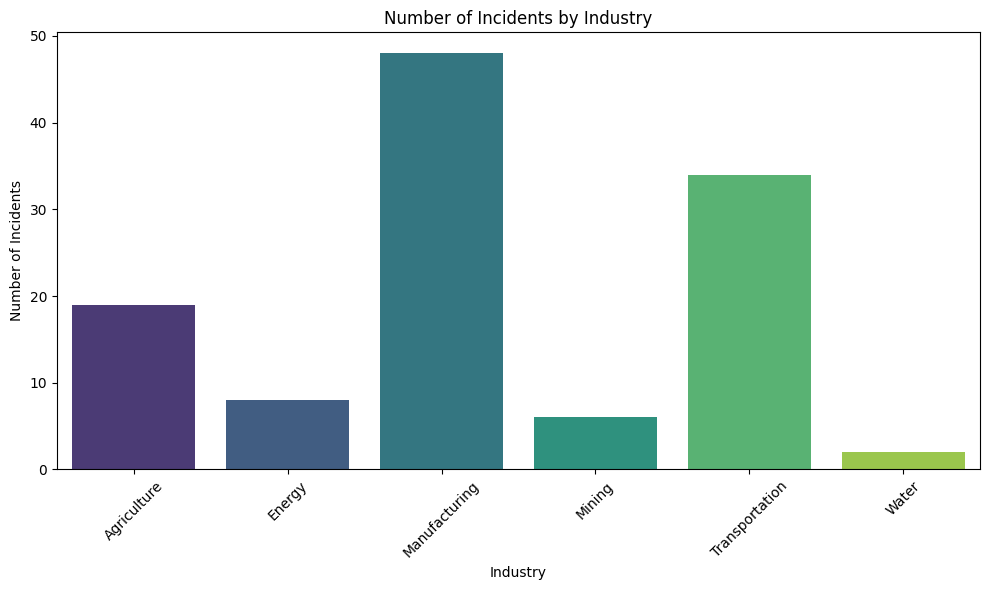

In [115]:
industry_counts = df.filter(like='industry_').sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.index.str.replace('industry_', ''), y=industry_counts.values, palette='viridis')
plt.title('Number of Incidents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart displays the number of cybersecurity incidents classified by industry. It allows for a quick identification of the sectors most affected by these incidents. We can see that "process manufacturing" and "oil & gas" have a significant number of incidents, indicating the vulnerability of these industries to cyberattacks.

This chart presents the number of incidents by region. It helps understand the geographic areas most exposed to cyberattacks. Here, we observe a concentration of incidents in Iran and Europe, suggesting that these regions might be focal points for improving cybersecurity.

### Number of Incidents by Continent.

C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_23264\1790244416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')


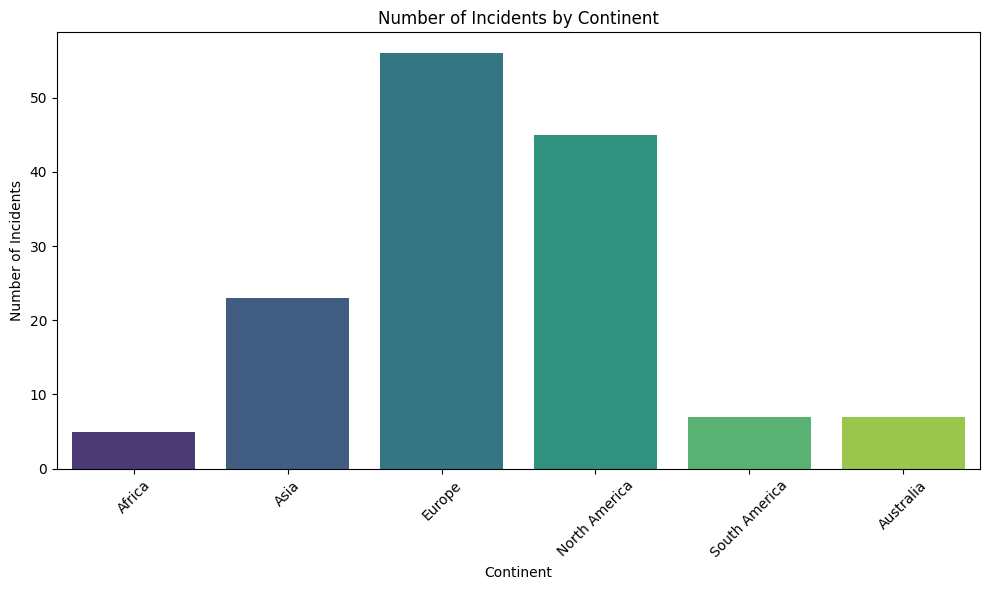

In [116]:
continent_counts = df[['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Australia']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')
plt.title('Number of Incidents by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart represents the number of cybersecurity incidents by continent based on the cleaned CSV data. Europe is the most affected continent with over 50 incidents, likely due to the concentration of advanced technological infrastructure and critical sectors that make it a prime target for cyberattacks. North America follows closely with around 40 incidents, reflecting its heavy reliance on digitalization across industries and commerce, which exposes it to significant cyber risks. Asia, with approximately 25 incidents, ranks third, as its growing economy and critical infrastructure also attract cyber threats. Africa, South America, and Australia report significantly fewer incidents, with Africa showing under 10, and South America and Australia reporting slightly higher numbers but still relatively low compared to other continents. 

This disparity could be due to a combination of less digital infrastructure in some regions and underreporting of incidents. Overall, the chart highlights that regions with more developed economies and digital infrastructures, like Europe and North America, are the most impacted, underscoring the need for robust cybersecurity measures in these areas, while Asia’s growing incident count also emphasizes the importance of security in emerging regions. The lower numbers in other continents may indicate either a lack of reporting or less technologically advanced infrastructures.


### Comparison of Incidents by Industry Over Years.

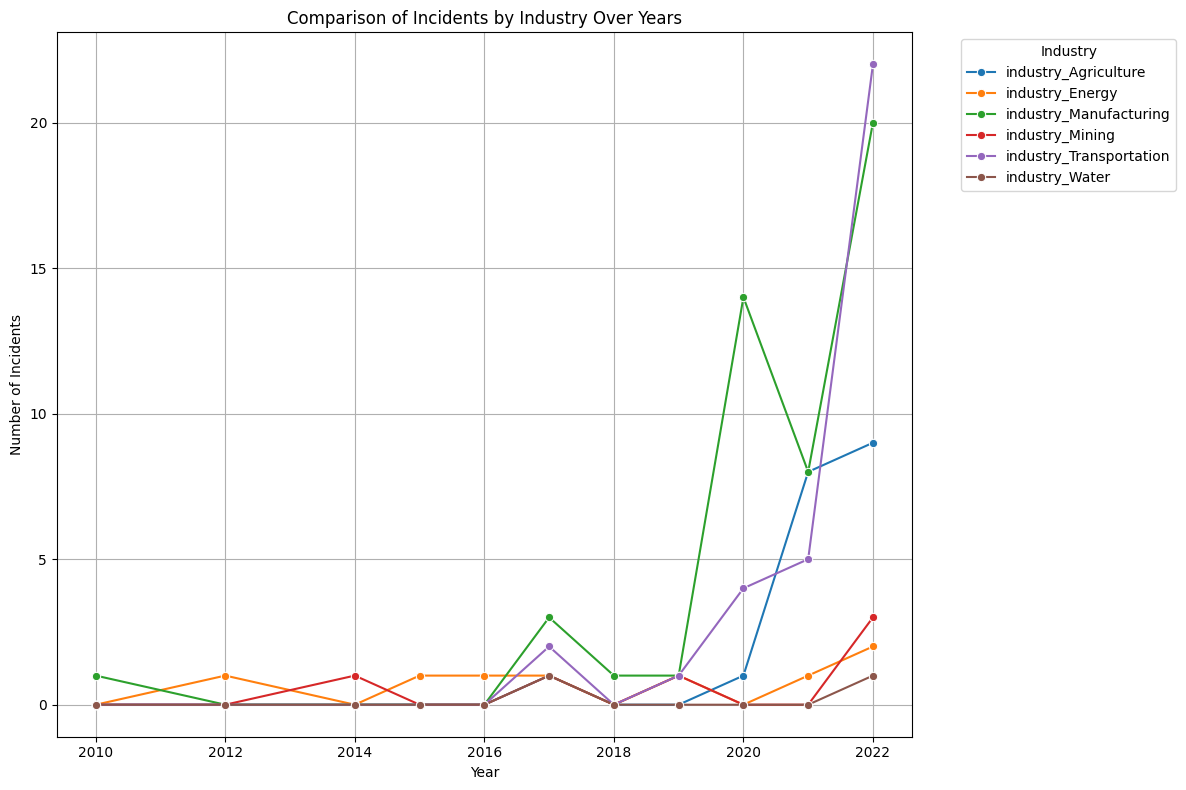

In [117]:
incidents_by_year_and_industry = df.groupby('year')[df.filter(like='industry_').columns].sum()

plt.figure(figsize=(12, 8))
for column in incidents_by_year_and_industry.columns:
    sns.lineplot(data=incidents_by_year_and_industry, x=incidents_by_year_and_industry.index, y=incidents_by_year_and_industry[column], marker='o', label=column)

plt.title('Comparison of Incidents by Industry Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The line plot shows a sharp rise in cybersecurity incidents since 2019, with Manufacturing and Transportation being the most affected, especially in 2022. Agriculture has also seen steady growth in incidents, while Water and Mining show few reported cases. The Energy sector remains relatively stable but shows increased vulnerability after 2020. Overall, the trend highlights growing cyber threats, particularly for Manufacturing, Transportation, and Agriculture as they become more digitally interconnected.

Extensión del análisis de texto (NLP)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Preparación de textos
texts = df['incident_summary']  # Reemplazar con la columna de texto

# Generación de vectores TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Reducción de dimensionalidad (opcional)
svd = TruncatedSVD(n_components=100, random_state=42)
text_features = svd.fit_transform(tfidf_matrix)

# Añadir las características textuales al dataset
for i in range(text_features.shape[1]):
    df[f'text_feature_{i}'] = text_features[:, i]

print(f'Text features shape: {text_features.shape}')


Text features shape: (112, 100)


C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_23264\2338567666.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'text_feature_{i}'] = text_features[:, i]
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_23264\2338567666.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'text_feature_{i}'] = text_features[:, i]
C:\Users\Daniel Bolaños\AppData\Local\Temp\ipykernel_23264\2338567666.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w